## Compare the similarities of the synthietic data with real data based on some evalutation matrices

### Step 1: Load real stock data


In [15]:
from stock_dataLoader import stock_load_dataset
from torch.utils import data
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_set = stock_load_dataset(
    is_normalize = True,
    one_hot_encode = False,
    data_mode = 'Train',
    augment_times=None,
    verbose=False
)

output shape is (3535, 6, 1, 150)
x_train shape is (2828, 6, 1, 150), x_test shape is (707, 6, 1, 150)
y_train shape is (2828,), y_test shape is (707,)


In [3]:

real_data_loader = data.DataLoader(train_set, batch_size=1, num_workers=1, shuffle=True)

real_stock = []

for i, (real_sig, label) in enumerate(real_data_loader):
    real_sig = real_sig.cpu().detach().numpy()
    sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
    real_stock.append(sig)
    
real_stock = np.array(real_stock)
print(real_stock.shape)


(2828, 6, 150)


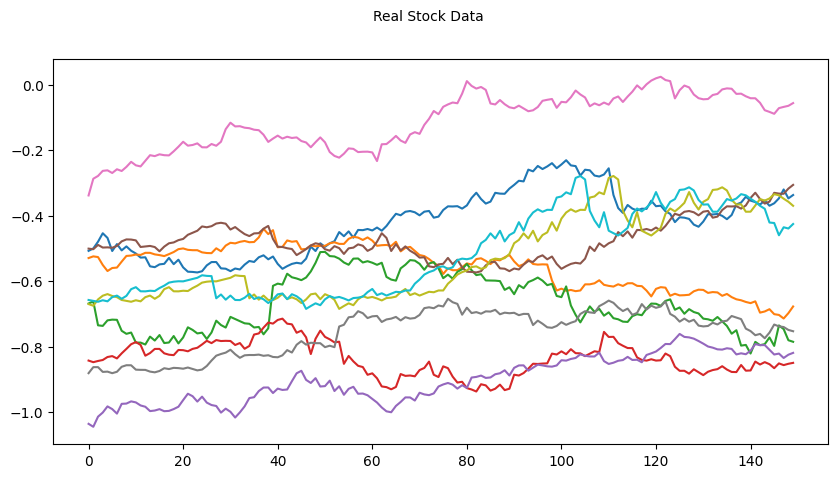

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Real Stock Data', fontsize=10)
for i in range(10):
    ax.plot(real_stock[i+1000][0][:])
    

### Step 2: Load synthetic running and juumping data

In [5]:
from LoadSyntheticStockData import SyntheticStockDataset
from torch.utils import data

In [6]:
exp = 'Running_2025_01_04_12_39_28'
path = f'./logs/{exp}/Model/checkpoint'


syn_data = SyntheticStockDataset(
    stock_model_path=path,
    sample_size=1000,)

/export/home/pwag/repos/tts-gan/LoadSyntheticStockData.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckp = torch.load(stock_model_path)


(3000, 6, 1, 150)
(3000,)


In [7]:
syn_data_loader = data.DataLoader(syn_data, batch_size=1, num_workers=1, shuffle=True)

In [8]:
import matplotlib.pyplot as plt
syn_stock = []

for i, (syn_sig, label) in enumerate(syn_data_loader):
    syn_sig = syn_sig.cpu().detach().numpy()
    sig = syn_sig.reshape(syn_sig.shape[1], syn_sig.shape[3])
    syn_stock.append(sig)
    
syn_stock = np.array(syn_stock)
print(syn_stock.shape)

(3000, 6, 150)


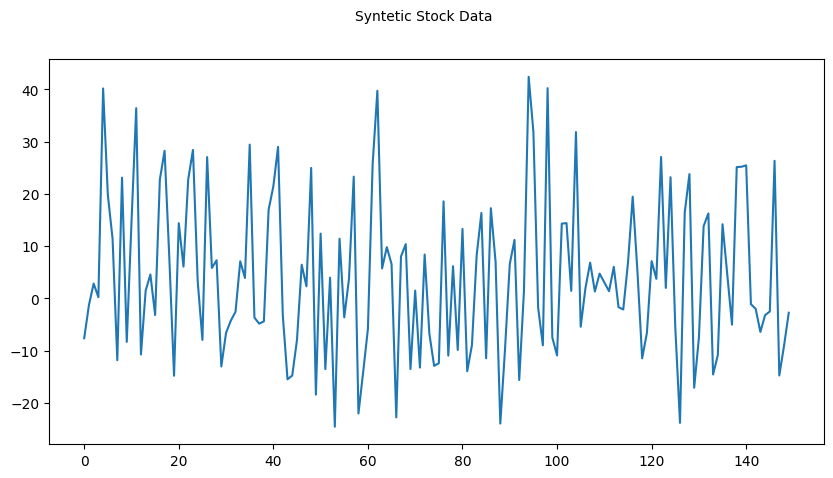

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Syntetic Stock Data', fontsize=10)
for i in range(1):
    ax.plot(syn_stock[i+100][0][:])


### Step 3: PCA

In [10]:
print(real_stock.shape)
print(syn_stock.shape)


(2828, 6, 150)
(3000, 6, 150)


In [11]:
real_stock = np.transpose(real_stock, (0, 2, 1))
syn_stock = np.transpose(syn_stock, (0, 2, 1))
print(real_stock.shape)
print(syn_stock.shape)

(2828, 150, 6)
(3000, 150, 6)


In [12]:
from visualizationMetrics import visualization

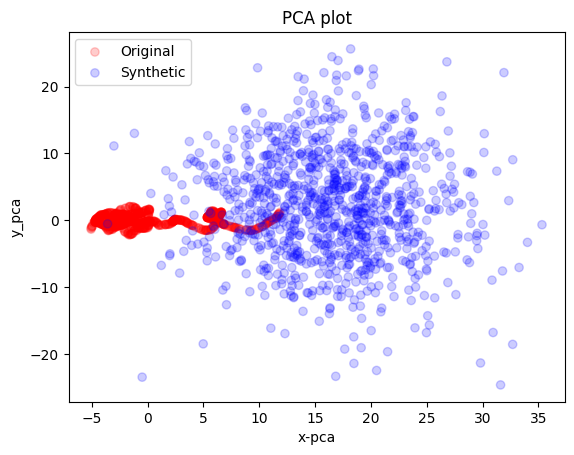

In [13]:
visualization(real_stock, syn_stock, 'pca', 'Stock-pca')

/export/home/pwag/repos/tts-gan/venv/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.895584
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.820587
[t-SNE] KL divergence after 300 iterations: 2.281258


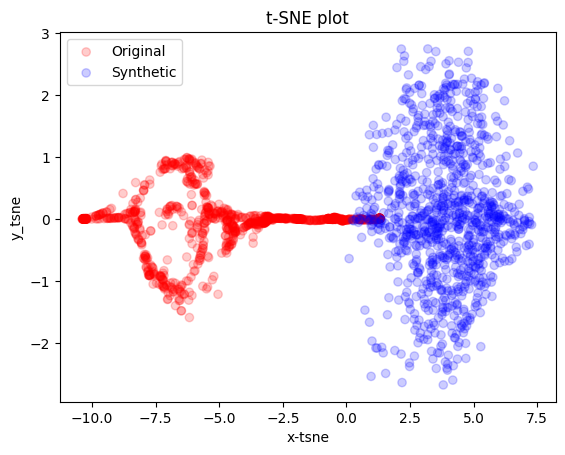

In [14]:
visualization(real_stock, syn_stock, 'tsne', 'Running-tsne')